In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [2]:
df = pd.read_csv("bank_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (2000, 32)


In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
data2 = min_max_scaler.fit_transform(data)

In [4]:
df

,age,education,balance,day,duration,campaign,pdays,sin_month,cos_month,job_blue-collar,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts
0,0.344086,1.0,0.673351,0.032258,1.626738,0.181818,0.567136,0.866025,-5.000000e-01,0,...,0,0,0,0,1,0,1,0,0,0.698135
1,0.419355,0.5,0.772848,0.032258,0.683075,0.181818,0.573587,0.866025,-5.000000e-01,0,...,0,0,0,0,0,0,1,1,0,0.516808
2,0.634409,0.5,0.878130,0.032258,0.419190,0.181818,0.866879,0.866025,-5.000000e-01,0,...,0,0,0,1,0,0,1,1,0,0.516808
3,0.505376,0.5,0.675469,0.032258,0.768219,0.090909,0.864478,0.866025,-5.000000e-01,1,...,0,0,0,1,0,0,1,1,0,0.516808
4,0.580645,0.5,0.869163,0.032258,1.110459,0.090909,1.017941,0.866025,-5.000000e-01,0,...,0,0,0,1,0,0,1,0,0,0.295154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.215054,0.5,1.286239,0.516129,0.868524,0.181818,0.009950,-1.000000,-1.836970e-16,0,...,0,0,1,0,1,0,0,0,1,0.295154
1996,0.301075,0.5,0.575012,0.516129,1.902895,0.181818,0.009950,-1.000000,-1.836970e-16,0,...,0,0,1,0,1,0,0,0,1,0.295154
1997,0.870968,0.0,0.911826,0.548387,0.678730,0.090909,0.009950,-1.000000,-1.836970e-16,0,...,0,0,1,1,0,0,0,0,1,0.009950
1998,0.494624,0.0,1.547316,0.645161,0.573208,0.090909,0.009950,-1.000000,-1.836970e-16,0,...,0,0,1,1,0,0,1,0,1,0.009950


In [5]:
data

array([[0.34408602, 1.        , 0.673351  , ..., 0.        , 0.        ,
        0.69813472],
       [0.41935484, 0.5       , 0.77284759, ..., 1.        , 0.        ,
        0.5168077 ],
       [0.6344086 , 0.5       , 0.87813036, ..., 1.        , 0.        ,
        0.5168077 ],
       ...,
       [0.87096774, 0.        , 0.91182617, ..., 0.        , 1.        ,
        0.00995033],
       [0.49462366, 0.        , 1.54731624, ..., 0.        , 1.        ,
        0.00995033],
       [0.43010753, 0.5       , 1.81261124, ..., 0.        , 1.        ,
        0.29515409]])

In [6]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [7]:
k = 3

In [8]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [9]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [10]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


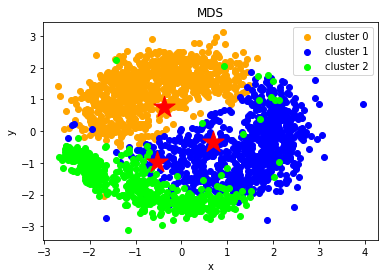

In [11]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [12]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


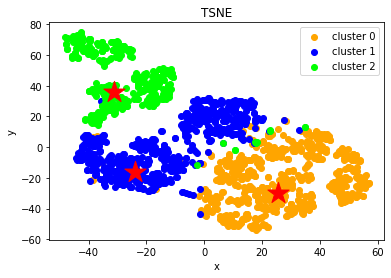

In [13]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [14]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [15]:
df.head()

,age,education,balance,day,duration,campaign,pdays,sin_month,cos_month,job_blue-collar,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts,cluster
0,0.344086,1.0,0.673351,0.032258,1.626738,0.181818,0.567136,0.866025,-0.5,0,...,0,0,0,1,0,1,0,0,0.698135,0
1,0.419355,0.5,0.772848,0.032258,0.683075,0.181818,0.573587,0.866025,-0.5,0,...,0,0,0,0,0,1,1,0,0.516808,0
2,0.634409,0.5,0.878130,0.032258,0.419190,0.181818,0.866879,0.866025,-0.5,0,...,0,0,1,0,0,1,1,0,0.516808,0
3,0.505376,0.5,0.675469,0.032258,0.768219,0.090909,0.864478,0.866025,-0.5,1,...,0,0,1,0,0,1,1,0,0.516808,0
4,0.580645,0.5,0.869163,0.032258,1.110459,0.090909,1.017941,0.866025,-0.5,0,...,0,0,1,0,0,1,0,0,0.295154,0


In [16]:
df.tail()

,age,education,balance,day,duration,campaign,pdays,sin_month,cos_month,job_blue-collar,...,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts,cluster
1995,0.215054,0.5,1.286239,0.516129,0.868524,0.181818,0.00995,-1.0,-1.836970e-16,0,...,0,1,0,1,0,0,0,1,0.295154,2
1996,0.301075,0.5,0.575012,0.516129,1.902895,0.181818,0.00995,-1.0,-1.836970e-16,0,...,0,1,0,1,0,0,0,1,0.295154,2
1997,0.870968,0.0,0.911826,0.548387,0.678730,0.090909,0.00995,-1.0,-1.836970e-16,0,...,0,1,1,0,0,0,0,1,0.009950,2
1998,0.494624,0.0,1.547316,0.645161,0.573208,0.090909,0.00995,-1.0,-1.836970e-16,0,...,0,1,1,0,0,1,0,1,0.009950,2
1999,0.430108,0.5,1.812611,0.709677,0.627360,0.181818,0.00995,-1.0,-1.836970e-16,0,...,0,1,1,0,0,0,0,1,0.295154,2


In [17]:
df.groupby('cluster').mean()

,age,education,balance,day,duration,campaign,pdays,sin_month,cos_month,job_blue-collar,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.444229,0.589436,0.789530,0.433761,0.564325,0.182036,0.826451,0.656089,0.516203,0.198079,...,0.038415,0.008403,0.000000,0.612245,0.258103,0.012005,0.743097,0.230492,0.024010,0.736702
1,0.471441,0.658865,0.982288,0.489270,0.882955,0.173308,0.729908,-0.247751,-0.428229,0.079433,...,0.161702,0.619858,0.004255,0.546099,0.367376,0.001418,0.209929,0.036879,0.984397,0.866813
2,0.422124,0.601732,0.838704,0.405600,0.803781,0.158796,0.020626,0.140113,-0.595330,0.166667,...,0.002165,0.000000,0.976190,0.467532,0.432900,0.008658,0.424242,0.069264,0.619048,0.203463
